# Pymaceuticals Inc.
---

### Analysis

One significant trend in the data is as the timepoint increased the tumor volume goes down.


In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharmacy_df = pd.merge(mouse_metadata, study_results, how ='outer')

# Display the data table for preview
pharmacy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
pharmacy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [19]:
# Checking the number of mice.
total_mice = (pharmacy_df['Mouse ID'].nunique())
total_mice

249

In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
all_mice = pharmacy_df.duplicated(subset =['Mouse ID', 'Timepoint'])
all_mice
duplicated_ID = pharmacy_df.loc[all_mice]
duplicated_ID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = pharmacy_df.loc[pharmacy_df['Mouse ID'] == 'g989']
duplicated_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = pharmacy_df.loc[pharmacy_df['Mouse ID'] != 'g989']
cleaned_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_totals = len(cleaned_mouse_df['Mouse ID'].unique())
cleaned_mouse_totals

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = pharmacy_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_volume = pharmacy_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_volume_variance = pharmacy_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_volume_std = pharmacy_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_volume_err = pharmacy_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

tumors = list(zip(mean_tumor_volume, median_tumor_volume,tumor_volume_variance, tumor_volume_std, tumor_volume_err))

summary_df = pd.DataFrame(tumors, columns = ['Mean Tumor Volume', 'Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.'])
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,40.675741,41.557809,24.947764,4.994774,0.329346
1,52.591172,51.776157,39.290177,6.268188,0.469821
2,52.884795,51.820584,43.128684,6.567243,0.492236
3,55.235638,53.698743,68.553577,8.279709,0.603860
4,54.331565,52.509285,66.173479,8.134708,0.596466
5,54.033581,52.288934,61.168083,7.821003,0.581331
6,52.322552,50.854632,42.351070,6.507770,0.512884
7,40.216745,40.673236,23.486704,4.846308,0.320955
8,54.233149,52.431737,59.450562,7.710419,0.573111
9,53.236507,51.818479,48.533355,6.966589,0.516398


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat = pharmacy_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
summary_stat


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

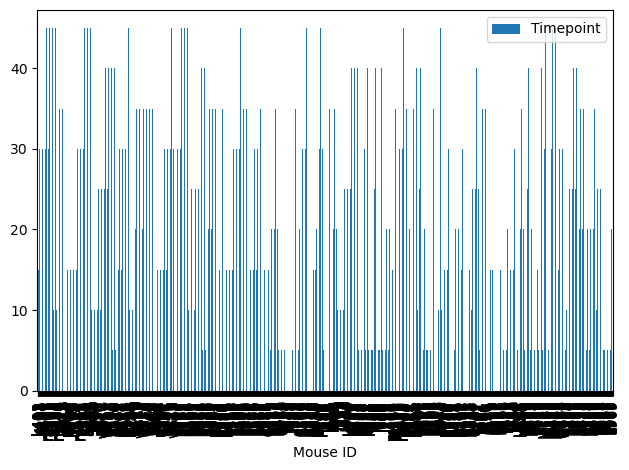

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pharmacy_df.plot.bar('Mouse ID','Timepoint')
plt.tight_layout()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ramicane'),
  Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Ceftamin'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Naftisol')])

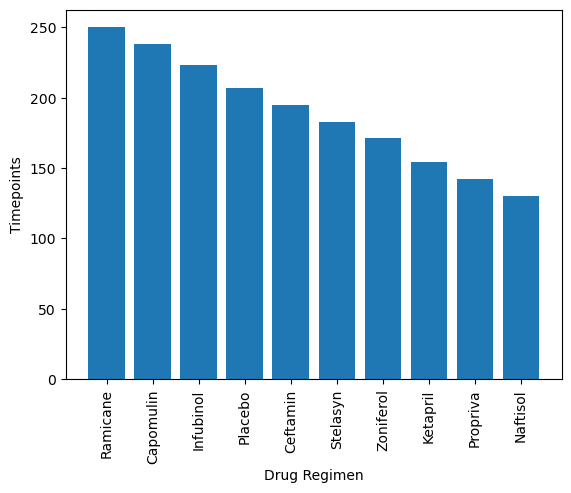

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = pharmacy_df['Drug Regimen'].unique()
timepoints = pharmacy_df['Timepoint'].value_counts()

plt.bar(x_axis,timepoints, align = 'center')
plt.xlabel ("Drug Regimen")
plt.ylabel ("Timepoints")
plt.xticks(rotation = 90)

<Axes: ylabel='count'>

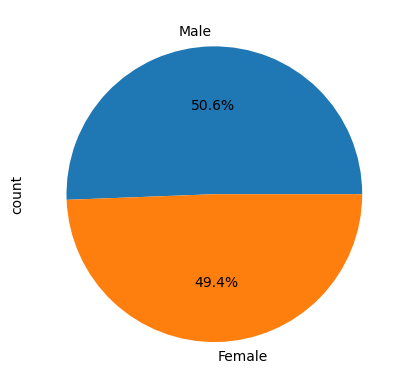

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders = pharmacy_df['Sex'].value_counts()
genders.plot.pie(autopct = '%1.1f%%')


<function matplotlib.pyplot.show(close=None, block=None)>

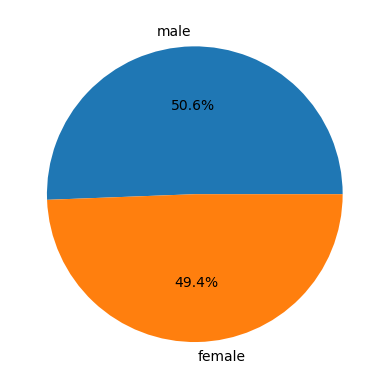

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['male', 'female']
distribution = pharmacy_df['Sex'].value_counts()

plt.pie(distribution, labels = labels, autopct = '%1.1f%%')
plt.show

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = pharmacy_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_tumor, pharmacy_df, how = 'left')

In [31]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


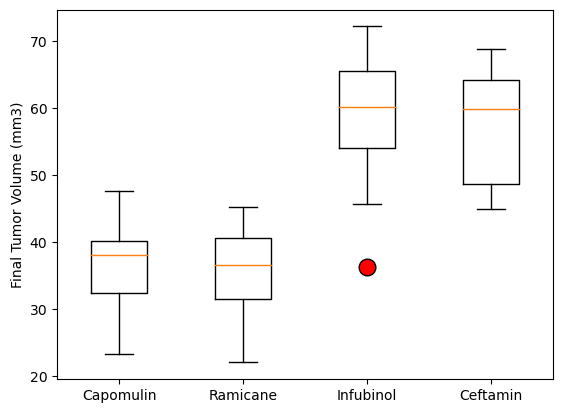

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot()
ax1.set_ylabel()

## Line and Scatter Plots

Text(0.5, 1.0, 'Campomulin treatment of mouse I509')

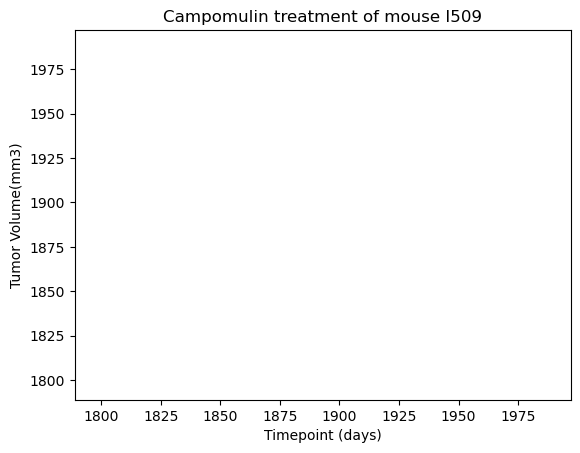

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = pharmacy_df['Timepoint'].count()
y_axis = pharmacy_df['Tumor Volume (mm3)'].count()
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Campomulin treatment of mouse I509')


In [59]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
campomulin_mouse = pharmacy_df.loc[pharmacy_df['Drug Regimen'] =='Capomulin']

x_axis = pharmacy_df['Weight (g)'].count()
y-axis = pharmacy_df.groupby(['Mouse ID'])['Tumor Volume'].mean()
pharmacy_df.plot.scatter(x_axis, y_axis)


SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (1533868305.py, line 5)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


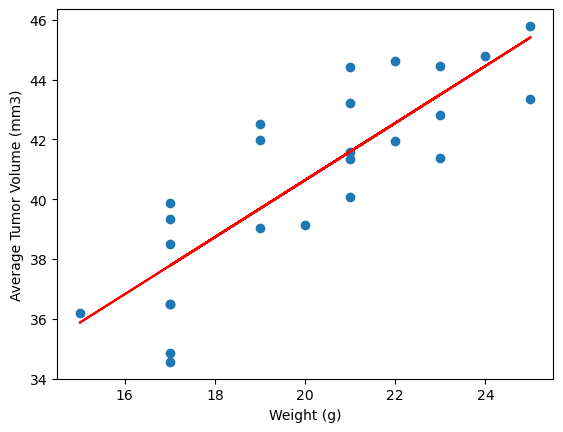

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
output = st.pearsonr()